In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tarfile 

In [2]:
def midi_to_note_name(midi_note):
    """
    Convert MIDI note number to note name.
    """
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = (midi_note // 12) - 1
    note_index = midi_note % 12
    note_name = notes[note_index]
    return f"{note_name}{octave}"

In [3]:
# List Files in Data Directory
dataDir = "../music_data/"
files = os.listdir(dataDir)
print(f"{files}")

['musicnet.tar.gz', 'musicnet_metadata.csv', 'musicnet_midis.tar.gz']


In [4]:
# Input Metadata into Pandas
metadata = pd.read_csv(os.path.join(dataDir, "musicnet_metadata.csv"))
metadata

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546
...,...,...,...,...,...,...,...,...,...
325,2632,Beethoven,Piano Sonata No 10 in G major,2. Andante,Solo Piano,Paul Pitman,piano-midi.de,OP14NO2,341
326,2633,Beethoven,Piano Sonata No 10 in G major,3. Scherzo: Allegro assai,Solo Piano,Paul Pitman,piano-midi.de,OP14NO2,227
327,2659,Bach,Violin Partita No 1 in B minor,6. Double,Solo Violin,John Garner,suzumidi,BWV1002,108
328,2677,Beethoven,Piano Sonata No 9 in E major,1. Allegro,Solo Piano,Paul Pitman,piano-midi.de,OP14NO1,445


In [5]:
metadata['id']

0      1727
1      1728
2      1729
3      1730
4      1733
       ... 
325    2632
326    2633
327    2659
328    2677
329    2678
Name: id, Length: 330, dtype: int64

In [6]:
# Select Random File or Pre-Chosen File and display its data
musicId = 2293
if musicId not in metadata['id'].values:
    musicId = metadata['id'].sample().iloc[0]
    
data = pd.read_csv(f'musicnet/train_labels/{musicId}.csv')
metadata['composition'].loc[metadata['id'] == musicId]

158    Cello Suite 4
Name: composition, dtype: object

In [7]:
data['note_value'].unique()

array(['Eighth', 'Quarter', 'Sixteenth', 'Tied Quarter-Sixteenth',
       'Dotted Eighth', 'Dotted Quarter', 'Half'], dtype=object)

In [8]:
data['end_beat'].unique()

array([0.5 , 1.  , 0.25, 1.25, 0.75, 1.5 , 2.  ])

In [9]:
data

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,51166,70110,43,39,0.00,0.50,Eighth
1,70110,99806,43,63,0.50,0.50,Eighth
2,99806,117214,43,58,1.00,0.50,Eighth
3,117214,135646,43,55,1.50,0.50,Eighth
4,135646,151518,43,58,2.00,0.50,Eighth
...,...,...,...,...,...,...,...
821,13468126,13475806,43,41,359.75,0.25,Sixteenth
822,13475806,13571038,43,39,360.00,1.00,Quarter
823,13475806,13571038,43,63,360.00,1.00,Quarter
824,13475806,13571038,43,55,360.00,1.00,Quarter


In [10]:
duration = {'Eighth' : .5, 'Quarter' : 1, 'Dotted Quarter' : 1.5, 'Whole': 4, 'Dotted Half' : 3, 'Sixteenth': .25, 'Dotted Sixteenth' : .375, 'Tied Quarter-Sixteenth' : .75, 'Half' : 2, 
            'Thirty Second' : .125, 'Tied Quarter-Thirty Second' : 1.125, 'Triplet Sixteenth' : .75, 'Dotted Eighth' : .75, 'Triplet' : 1/3, 'Unknown': 0};

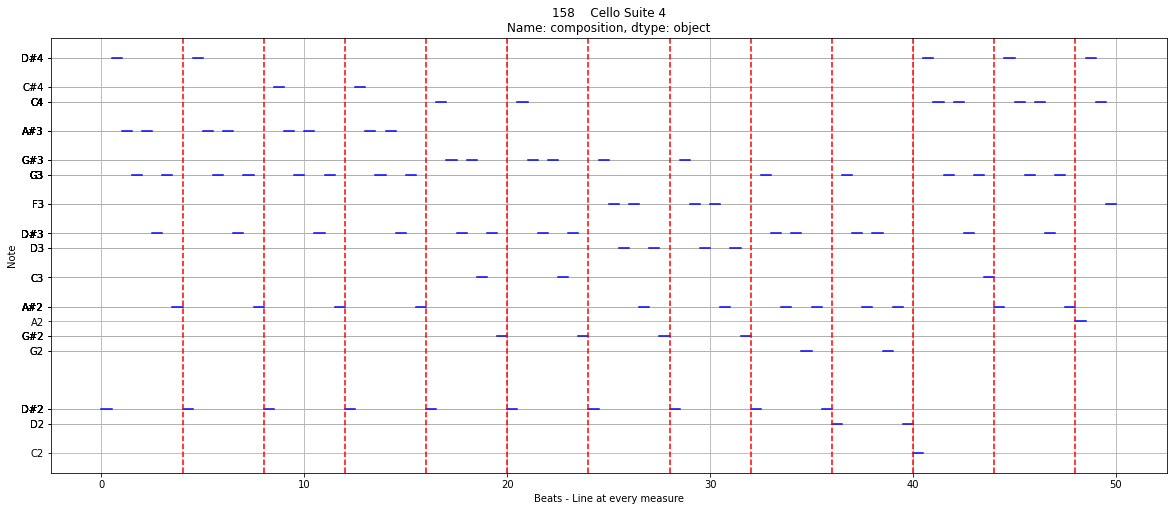

In [11]:
plt.figure(figsize=(20, 8))

x = data['start_beat'][:100]
y = data['note'][:100]

for i in range(len(x)):
    # plt.plot([x[i], x[i] + duration[data['note_value'][i]]], [y[i], y[i]], 'blue')
    plt.plot([x[i], x[i] + data['end_beat'][i]], [y[i], y[i]], 'blue')

for i in range(1, int(x.max() / 4) + 1):
    plt.axvline(x=i * 4, color='r', linestyle='--')
    
plt.title(f"{metadata['composition'].loc[metadata['id'] == musicId]}")
plt.xlabel("Beats - Line at every measure")
plt.ylabel("Note")
plt.yticks(y, [midi_to_note_name(i) for i in y])
plt.grid(True)
plt.show()
